In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

## Logistic Regression

### model

基本思想：Y值只能取0或1，因此将线性模型套一层sigmoid函数，作为**Y=0的概率**
$$ P(Y = 0 | X) = sigmoid(wx) $$

sigmoid函数的取值：**logistic distribution** CDF
$$ F(x) = \frac{1}{1 + e^{-x}} $$

Text(-3, 0.8, '$F(x) = \\frac{1}{1 + e^{-x}}$')

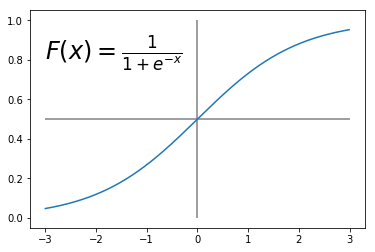

In [90]:
x = np.array([x / 100 for x in range(-300, 300)])
y = 1 / (1 + np.exp(-x))

plt.vlines(0, 0, 1, color='grey')
plt.hlines(0.5, -3, 3, color='grey')
plt.plot(x, y)
plt.text(-3, 0.8, r'$F(x) = \frac{1}{1 + e^{-x}}$', fontsize=24)

为什么sigmoid函数要取这个？因为这样取，模型就有了数学意义：Y=1的**对数几率(log odds)**为x的线性函数，即里面的$wx$

**几率(odds)** 指的是一件事发生和不发生的概率比值，对数几率(log odds)就是在外面套一层对数函数

$$ \text{log-odds} = \log(\frac{p}{1-p}) $$ 

Y=0和1的概率可以表示为：
$$ P(Y = 0) = F(wx) = \frac{e^{-wx}}{1 + e^{wx}}$$
$$ P(Y = 1) = 1 - F(wx) = \frac{1}{1 + e^{wx}}$$

两式相除得到 Y = 1 的对数几率： $ wx $

### 模型参数w的估计：极大似然估计 

经过一番不太复杂的推导，对数似然函数为：

$$ \sum_{i=1}^{N} y_i(wx_i) - \log(1 + e^{wx_i}))  \quad y_i \in {0, 1} $$

下面画图来理解这个函数

Text(0.5, 1.0, 'incorrect prediction')

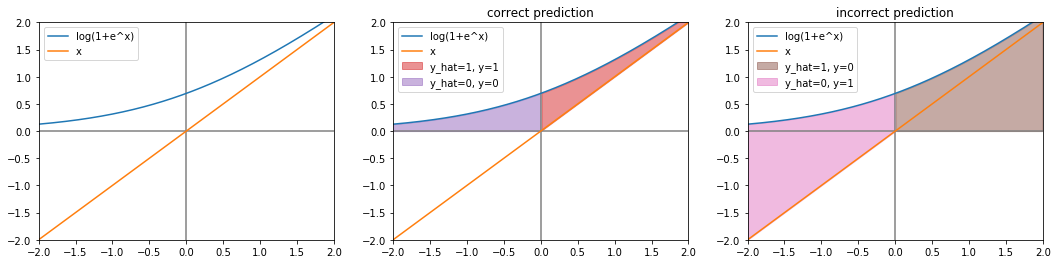

In [91]:
x = np.array([x / 100 for x in range(-200, 200)])
y = np.log(1 + np.exp(x))

fig, axs = plt.subplots(1, 3, figsize=(18, 4))

for i in range(3):
    ax = axs[i]
    ax.plot(x, y, label='log(1+e^x)')
    ax.plot(x, x, label='x')
    ax.vlines(0.0, ymin=-100, ymax=100, colors='grey')
    ax.hlines(0.0, xmin=-100, xmax=100, colors='grey')
    ax.set_ylim((-2, 2))
    ax.set_xlim((-2, 2))
    ax.legend()

# 预测正确
axs[1].fill_between(x[x > 0], x[x > 0], y[x > 0], color='C3', alpha=0.5, label='y_hat=1, y=1')
axs[1].fill_between(x[x < 0], 0, y[x < 0], color='C4', alpha=0.5, label='y_hat=0, y=0')
axs[1].legend()
axs[1].set_title('correct prediction')

# 预测错误
axs[2].fill_between(x[x > 0], 0, y[x > 0], color='C5', alpha=0.5, label='y_hat=1, y=0')
axs[2].fill_between(x[x < 0], x[x < 0], y[x < 0], color='C6', alpha=0.5, label='y_hat=0, y=1')
axs[2].legend()
axs[2].set_title('incorrect prediction')

最大化对数似然函数 ==> 最小化图中的面积

- 0附近的预测比较“重要”：
    + 预测错误，penalty较小
    + 预测正确，对L的“加成”较多
- 越是偏离0附近（即确定性较大、“理应”预测对的）的预测错误的“惩罚”越大、预测正确的“奖励”越小